In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dynamic_glmhmm
from scipy.stats import multivariate_normal, norm
# import jax

sns.set_context("talk")

In [2]:
# setting hyperparameters
S = 20 # sessions
T = 1000 # trials per session
N = T * S # total data points
C = 2 # classes
K = 1 # states
D = 2 # features (sensory & bias)

In [3]:
# True Transition Matrix
trueP = np.ones((N,1,1))
print("True Transition Matrix P")
print(trueP)

True Transition Matrix P
[[[1.]]

 [[1.]]

 [[1.]]

 ...

 [[1.]]

 [[1.]]

 [[1.]]]


# Fit Standard GLM-HMM on 1-state model

Session indicies
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
(20000, 1, 2, 2)


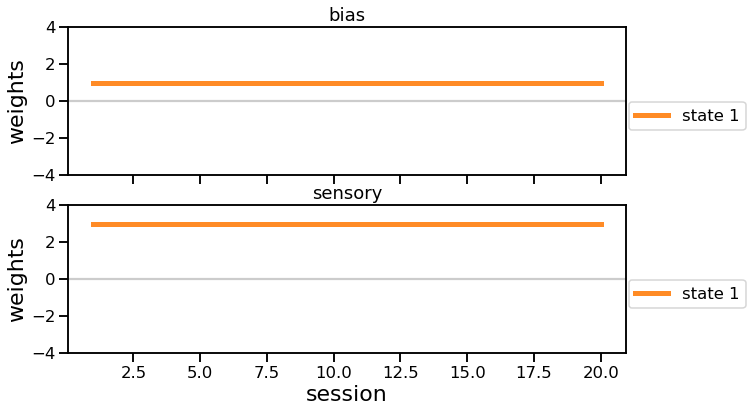

In [4]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = 3 # state 1 sensory (increasing)
ourW[:,0,0] = 1 # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,1] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(trueW, sessInd=sessInd, axes=axes, yLim=[[-4,4],[-4,4]], labels=['bias', 'sensory'], trueW=None)
print(trueW.shape)

In [10]:
dGLMHMM = dynamic_glmhmm.dynamic_GLMHMM(N,K,D,C)
truepi = np.ones((1))
trainX, trainY , z = dGLMHMM.simulate_data(trueW, trueP, truepi, sessInd)
testX, testY, _= dGLMHMM.simulate_data(trueW, trueP, truepi, sessInd) 
# trainX = np.load(f'../data/N={N}_{K}_state_drift_trainX.npy')
# trainY = np.load(f'../data/N={N}_{K}_state_drift_trainY.npy')
# testX = np.load(f'../data/N={N}_{K}_state_drift_testX.npy')
# testY = np.load(f'../data/N={N}_{K}_state_drift_testY.npy')

#simPhi = dGLM_HMM.observation_probability(simX, trueW)

In [11]:
model_type='standard'
initP, initpi, initW = dGLMHMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)], model_type=model_type) 
present = np.ones((N))
irrelevantSigma = np.ones((K,D))
checkP, checkpi, checkW, _ = dGLMHMM.fit(trainX, trainY,  present, initP=initP, initpi=initpi, initW=initW, sigma=irrelevantSigma, sessInd=sessInd, maxIter=250, tol=1e-4, priorDirP=None, model_type=model_type) # fit the model
     

0


(20000, 1, 2, 2)


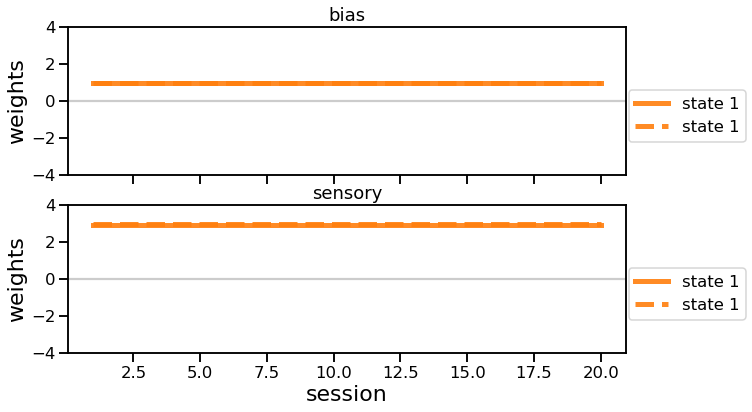

In [12]:
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(checkW, sessInd=sessInd, axes=axes, yLim=[[-4,4],[-4,4]], trueW=trueW, labels=['bias', 'sensory'])
print(checkW.shape)

0
(20000, 1, 2, 2)


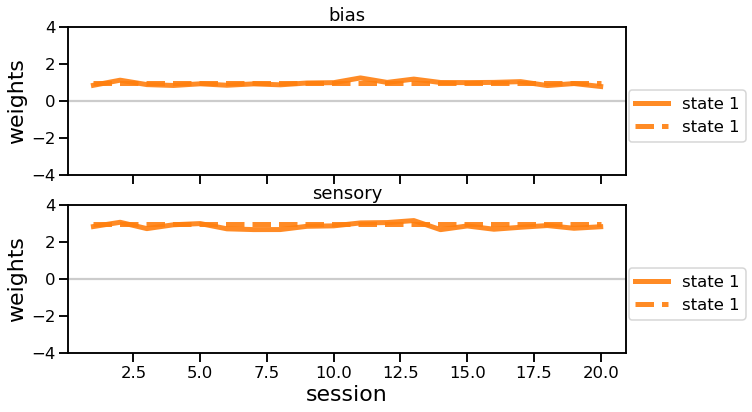

In [13]:
# fitting time-varying weights on static true ones
initP, initpi, initW = dGLMHMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)], model_type=model_type) 
present = np.ones((N))
irrelevantSigma = np.ones((K,D))
checkP, checkpi, checkW, _ = dGLMHMM.fit(trainX, trainY,  present, initP=initP, initpi=initpi, initW=initW, sigma=irrelevantSigma, sessInd=sessInd, maxIter=250, tol=1e-4, priorDirP=None, A=trueP[0], model_type='dynamic') # fit the model
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(checkW, sessInd=sessInd, axes=axes, yLim=[[-4,4],[-4,4]], trueW=trueW, labels=['bias', 'sensory'])
print(checkW.shape)
     

# Fit dynamic GLM-HMM on 1-state model

Session indicies
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
(20000, 1, 2, 2)


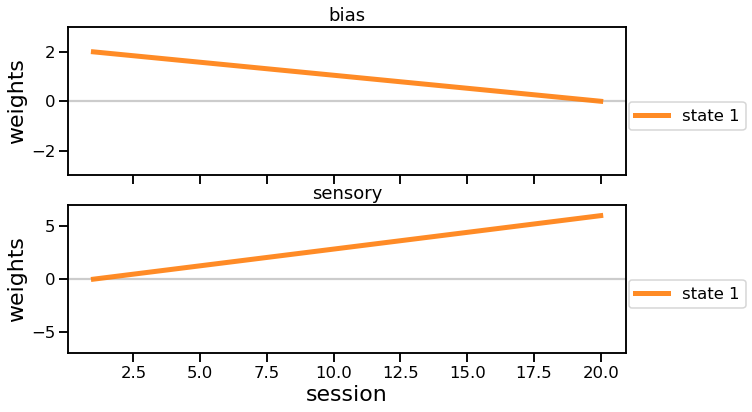

In [14]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,6,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(2,0,S) # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,1] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(trueW, sessInd=sessInd, axes=axes, yLim=[[-3,3],[-7,7]], labels=['bias', 'sensory'], trueW=None)
print(trueW.shape)

In [15]:
dGLMHMM = dynamic_glmhmm.dynamic_GLMHMM(N,K,D,C)
truepi = np.ones((1))
trainX, trainY , z = dGLMHMM.simulate_data(trueW, trueP, truepi, sessInd)
testX, testY, _= dGLMHMM.simulate_data(trueW, trueP, truepi, sessInd) 
# trainX = np.load(f'../data/N={N}_{K}_state_drift_trainX.npy')
# trainY = np.load(f'../data/N={N}_{K}_state_drift_trainY.npy')
# testX = np.load(f'../data/N={N}_{K}_state_drift_testX.npy')
# testY = np.load(f'../data/N={N}_{K}_state_drift_testY.npy')

#simPhi = dGLM_HMM.observation_probability(simX, trueW)

0
(20000, 1, 2, 2)


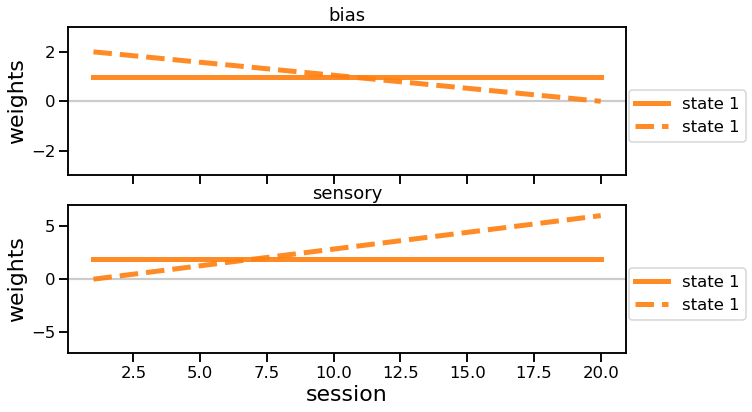

In [16]:
model_type = 'standard'
initP, initpi, initW = dGLMHMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)], model_type=model_type) 
present = np.ones((N))
irrelevantSigma = np.ones((K,D))
checkP, checkpi, checkW, _ = dGLMHMM.fit(trainX, trainY,  present, initP=initP, initpi=initpi, initW=initW, sigma=irrelevantSigma, sessInd=sessInd, maxIter=250, tol=1e-4, priorDirP=None, model_type=model_type) # fit the model
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(checkW, sessInd=sessInd, axes=axes, yLim=[[-3,3],[-7,7]], trueW=trueW, labels=['bias', 'sensory'])
print(checkW.shape)

0
(20000, 1, 2, 2)


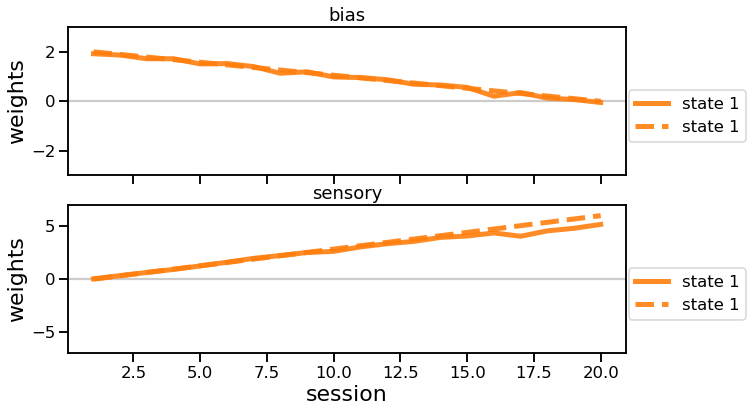

In [17]:
model_type = 'partial'
initP, initpi, initW = dGLMHMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)], model_type=model_type) 
present = np.ones((N))
irrelevantSigma = np.ones((K,D)) * 0.2
checkP, checkpi, checkW, _ = dGLMHMM.fit(trainX, trainY,  present, initP=initP, initpi=initpi, initW=initW, sigma=irrelevantSigma, sessInd=sessInd, maxIter=250, tol=1e-4, A=trueP[0], priorDirP=None, model_type=model_type) # fit the model
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(checkW, sessInd=sessInd, axes=axes, yLim=[[-3,3],[-7,7]], trueW=trueW, labels=['bias', 'sensory'])
print(checkW.shape)

0
(20000, 1, 2, 2)


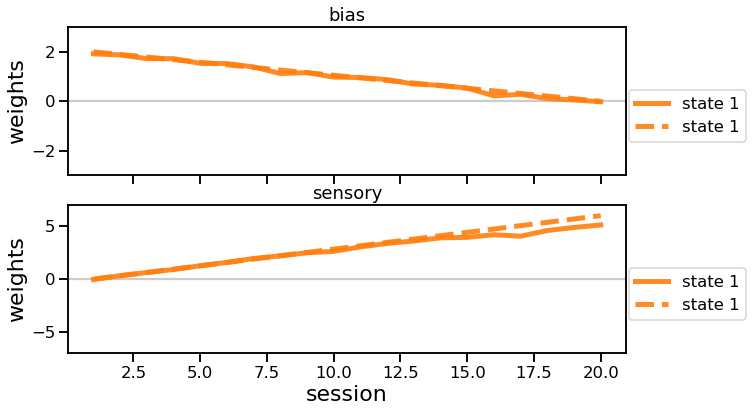

In [18]:
model_type = 'dynamic'
initP, initpi, initW = dGLMHMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)], model_type=model_type) 
present = np.ones((N))
irrelevantSigma = np.ones((K,D)) * 0.2
checkP, checkpi, checkW, _ = dGLMHMM.fit(trainX, trainY,  present, initP=initP, initpi=initpi, initW=initW, sigma=irrelevantSigma, sessInd=sessInd, maxIter=250, tol=1e-4, A=trueP[0], priorDirP=None, model_type=model_type) # fit the model
fig, axes = plt.subplots(2,1, figsize=(10,6), sharex=True)
plotting_weights_per_feature(checkW, sessInd=sessInd, axes=axes, yLim=[[-3,3],[-7,7]], trueW=trueW, labels=['bias', 'sensory'])
print(checkW.shape)

# OLD STUFF THAT NEEDS TO BE CLEANED 

In [5]:
#Fitting for multiple values of Sigma 
sigmaList = [0.01,0.032,0.1,0.32,1,10,100]
allLl, allP, allW = fit_multiple_sigmas(N=N,K=K,D=D,C=C, sessInd=sessInd, sigmaList=sigmaList, inits=1, maxiter=250, modelType='drift', save=True)

0


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / 

1


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


2


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


3
4


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


5
6


(array([[[-9824.53316045, -8169.51166529, -7815.85635908, ...,
          -5871.88928999, -5871.88669662, -5871.88418145],
         [-5871.88175389, -5782.51490324, -5728.45226125, ...,
              0.        ,     0.        ,     0.        ],
         [-5626.30817613, -5577.61668979, -5569.34978564, ...,
              0.        ,     0.        ,     0.        ],
         ...,
         [-5562.12603446, -5561.89041258, -5561.88969251, ...,
              0.        ,     0.        ,     0.        ],
         [-5561.88969076, -5561.8766452 , -5561.87664693, ...,
              0.        ,     0.        ,     0.        ],
         [-5561.87664776, -5561.87653537, -5561.8765353 , ...,
              0.        ,     0.        ,     0.        ]]]),
 array([[[[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]]]]),
 array([[[[[[ 0.55312514,  0.        ],
            [ 0.68935842,  0.        ]]],
 
 
          [[[ 0.55312514,  0.  

In [68]:
evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], modelType='drift', save=False)

array([[-0.68891189, -0.56525629, -0.53953632, -0.53975751, -0.53985551,
        -0.53986916, -0.53986931]])

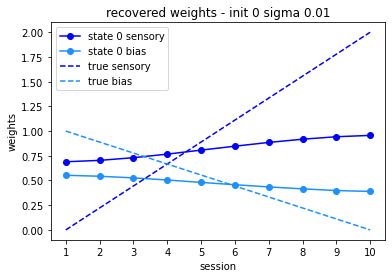

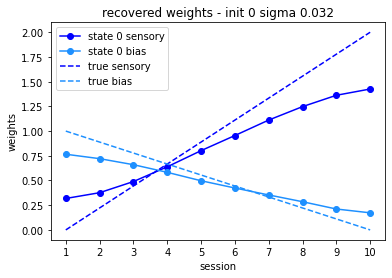

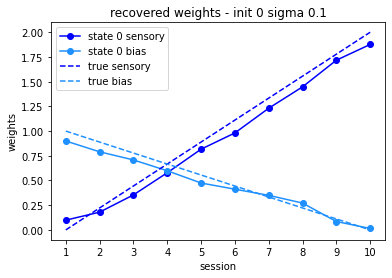

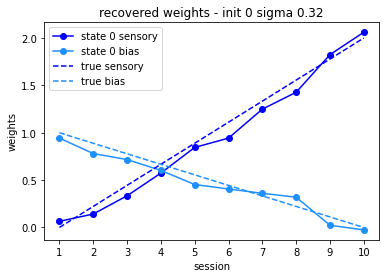

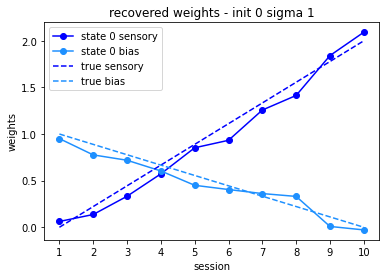

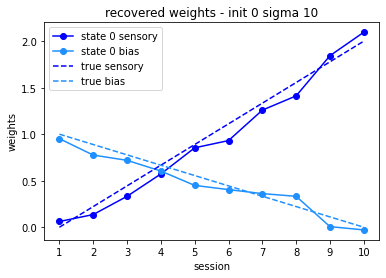

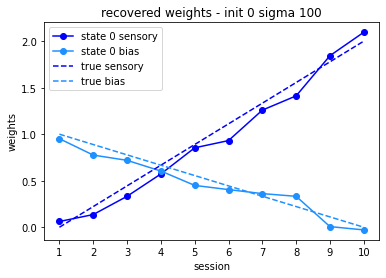

In [14]:
allW = np.load('../data//W_N=_{K}_state_{modelType}.npy')
sigmaList=[0.01,0.032,0.1,0.32,1,10,100]
for init in range(0,1):
    for indSigma in [2] #range(0,len(sigmaList)): # range(len(sigmaList)-1,-1,-1): - decreasing sigma
        
        plotting_weights(allW[init, indSigma], sessInd, trueW, f'recovered weights - init {init} sigma {sigmaList[indSigma]}')


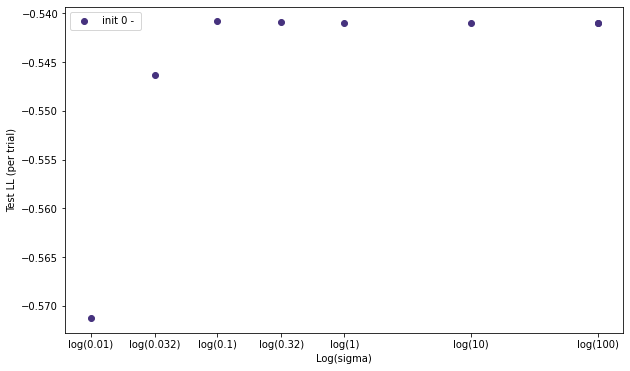

In [9]:
testLl = evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], modelType='drift', save=False)
sigmaList=[0.01,0.032,0.1,0.32,1,10,100]
fig, axes = plt.subplots(1, figsize = (10,6))
sigma_testLl_plot(sigmaList=sigmaList, testLl=testLl, axes=axes, title='', label='', save_fig=False)

Session indicies
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


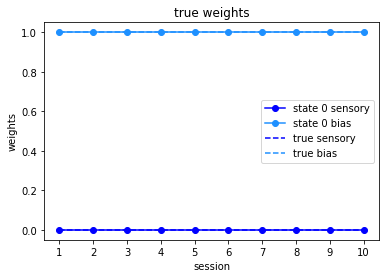

(10000, 1, 2, 2)


In [4]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = 0 # state 1 sensory (increasing)
ourW[:,0,0] = 1 # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
plotting_weights(trueW,sessInd,trueW,'true weights')
print(trueW.shape)


In [5]:
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/N={N}_{K}_state_constant_train')
# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/{K}_state_constant_test')
trainX = np.load(f'../data/N={N}_{K}_state_constant_trainX.npy')
trainY = np.load(f'../data/N={N}_{K}_state_constant_trainY.npy')

#simPhi = dGLM_HMM.observation_probability(simX, trueW)

In [9]:
oneSessInd = [0,N]
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0, K, D), sessInd=oneSessInd, pi0=None, maxIter=350, tol=1e-3) # fit the model
          

0


/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:413: RuntimeWarning: divide by zero encountered in true_divide
  invSigma = np.square(1/sigma[k,:])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:413: RuntimeWarning: divide by zero encountered in true_divide
  invSigma = np.square(1/sigma[k,:])


1


/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:413: RuntimeWarning: divide by zero encountered in true_divide
  invSigma = np.square(1/sigma[k,:])


KeyboardInterrupt: 

test LL per trial= -0.5859376032808302


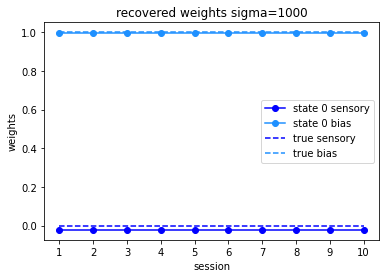

In [9]:
testX = np.load(f'../data/{K}_state_constant_testX.npy')
testY = np.load(f'../data/{K}_state_constant_testY.npy')
testPhi = dGLM_HMM.observation_probability(testX, checkW)
_, _, testLl = dGLM_HMM.forward_pass(testY,checkP,testPhi)
print("test LL per trial=", testLl/N)

plotting_weights(checkW, sessInd, trueW, 'recovered weights sigma='+str(ourSigma))


In [7]:
fit_multiple_sigmas(N=N,K=K,D=D,C=C, sessInd=sessInd, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], inits=1, maxiter=350, modelType='constant', save=True)

0


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


1
2
3


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


4
5
6


(array([[[-10493.22438476,  -8482.20521898,  -7546.26589292, ...,
               0.        ,      0.        ,      0.        ],
         [ -5829.36492452,  -5828.32166319,  -5827.83272526, ...,
               0.        ,      0.        ,      0.        ],
         [ -5827.08867453,  -5824.65148228,  -5824.56904174, ...,
               0.        ,      0.        ,      0.        ],
         ...,
         [ -5823.4406957 ,  -5823.38167349,  -5823.38171627, ...,
               0.        ,      0.        ,      0.        ],
         [ -5823.3817165 ,  -5823.38029488,  -5823.38029603, ...,
               0.        ,      0.        ,      0.        ],
         [ -5823.3802958 ,  -5823.38029059,  -5823.38029011, ...,
               0.        ,      0.        ,      0.        ]]]),
 array([[[[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]]]]),
 array([[[[[[ 0.99427213,  0.        ],
            [-0.02650709,  0.        ]]],

NameError: name 'sigma_testLl_plot' is not defined

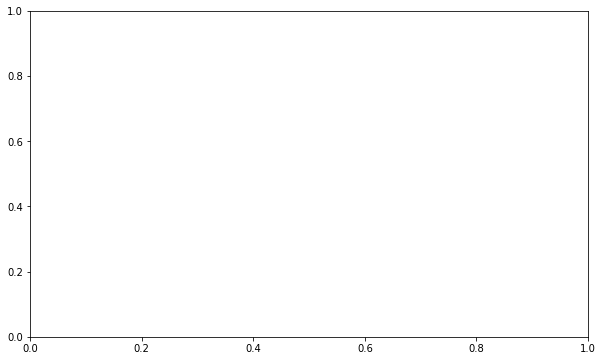

In [9]:
testLl = evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], modelType='constant', save=False)


fig, axes = plt.subplots(1, figsize = (10,6))
sigma_testLl_plot(sigmaList=sigmaList, testLl=testLl, axes=axes, title='', label='', save_fig=False)

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


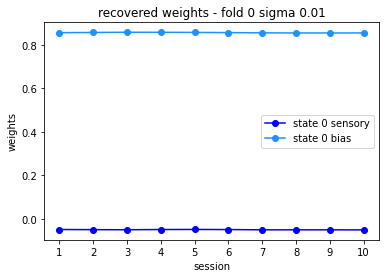

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


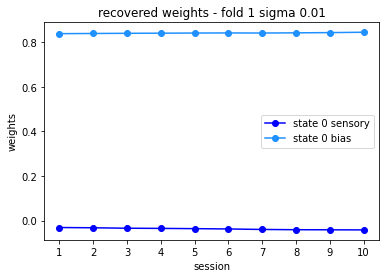

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


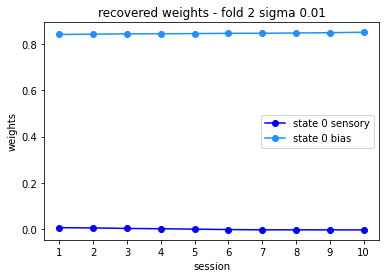

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


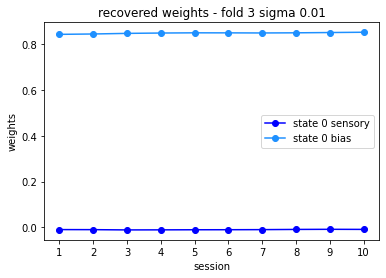

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


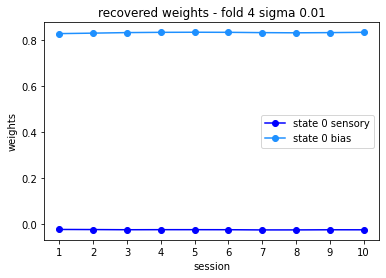

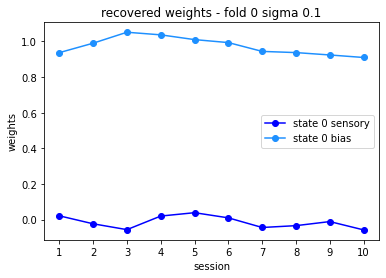

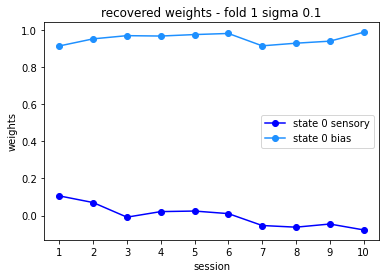

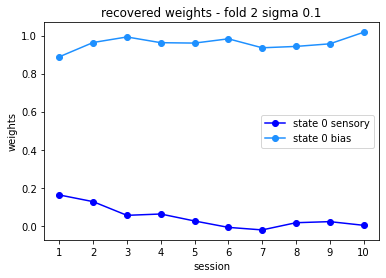

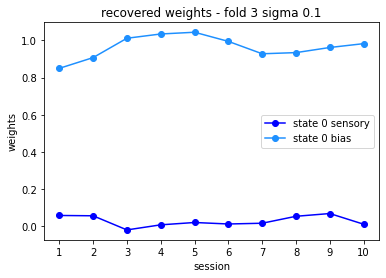

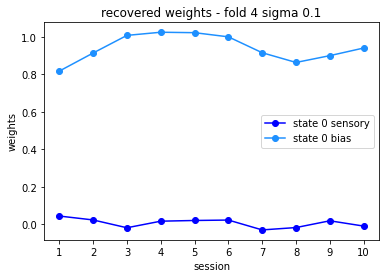

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


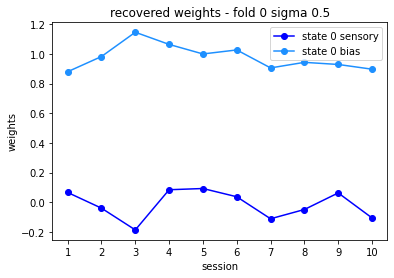

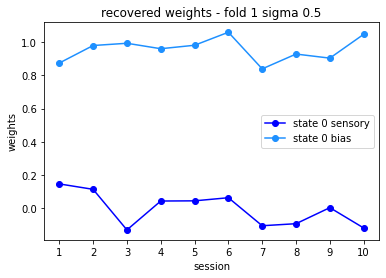

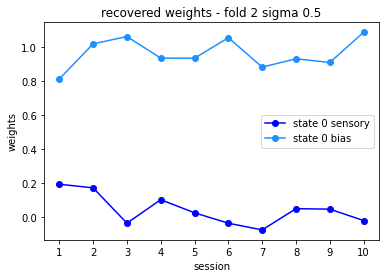

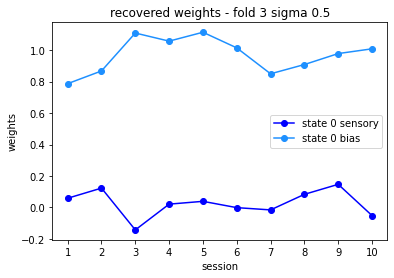

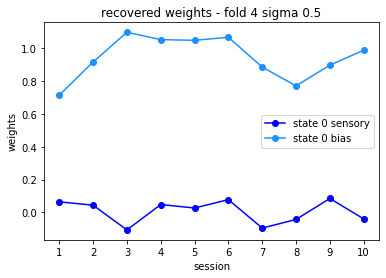

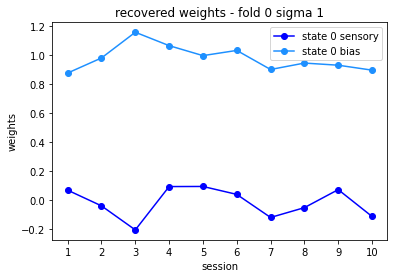

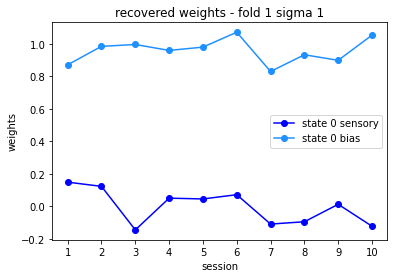

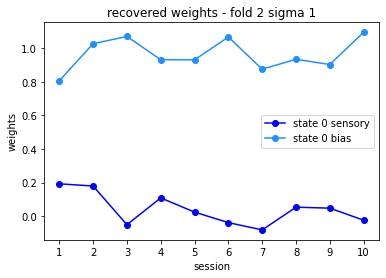

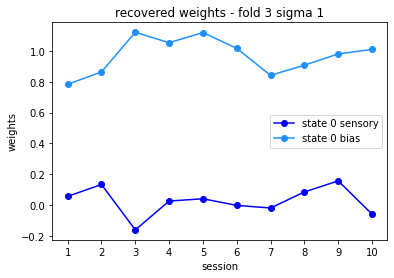

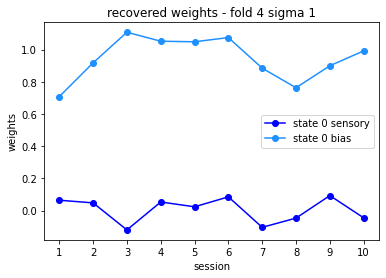

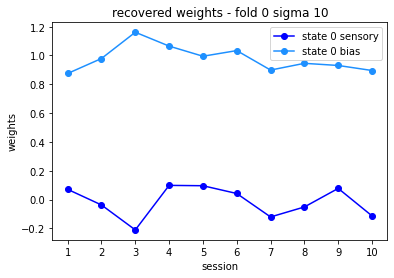

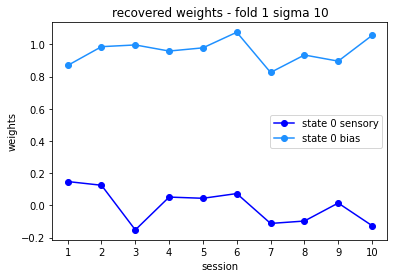

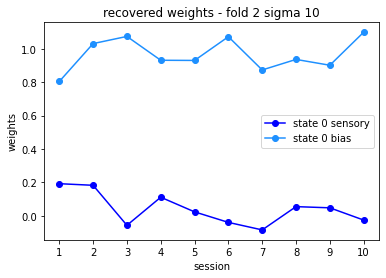

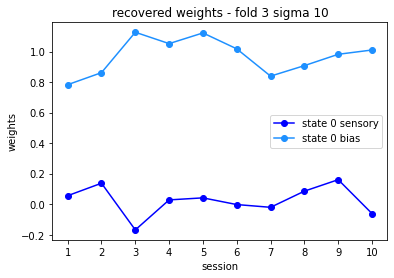

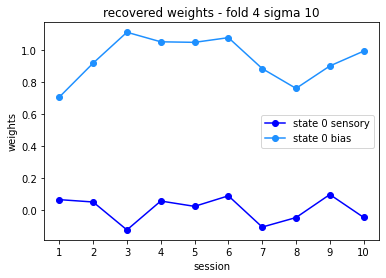

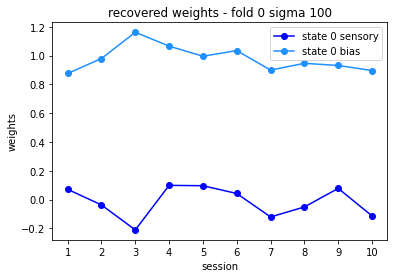

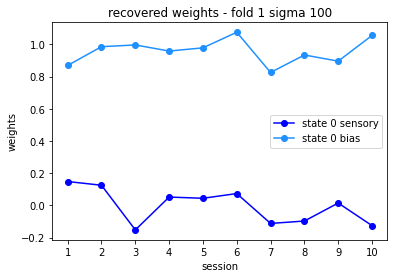

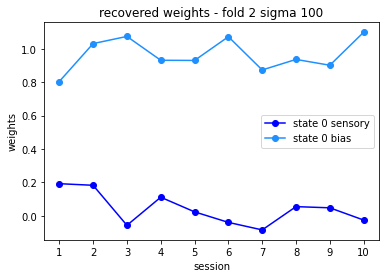

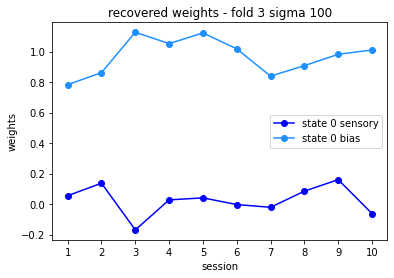

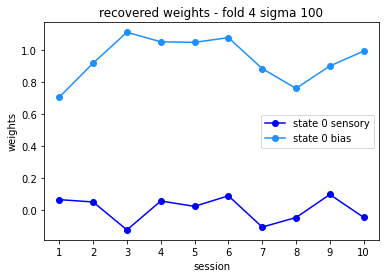

In [ ]:
# CV Fitting for multiple values of Sigma
sigmaList = [0.01,0.032,0.1,0.32,1,10,100]
folds = 5
inits = 3
trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd, folds=folds)
maxiter = 250 # 250 # maximum number of iterations

trainN = trainX[0].shape[0]
testLl = np.zeros((inits, len(sigmaList)))
trainLl = np.zeros((inits, folds, len(sigmaList), maxiter))
allP = np.zeros((inits, len(sigmaList), K,K))
allW = np.zeros((inits, len(sigmaList),N,K,D,C))
for init in range(0,inits):
    for indSigma in range(0, len(sigmaList)):  
        if (indSigma == 0):
            initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
        else:
            initP = allP[indSigma-1]
            initW = allW[indSigma-1]
            
        temptestLl = np.zeros((folds))
        temptrainLl = np.zeros((folds, maxiter))
        tempP = np.zeros((folds,K,K))
        tempW = np.zeros((folds,trainN,K,D,C))
        tempW_reshaped = np.zeros((folds,N,K,D,C))

        for i in range(0, folds):    
            initW_reshaped = reshapeWeights(w=initW, oldSessInd=sessInd, newSessInd=trainSessInd[i])
            # fit on train data
            tempP[i], tempW[i], temptrainLl[i] = dGLM_HMM.fit(trainX[i], trainY[i],  initP, initW_reshaped, sigma=reshapeSigma(sigmaList[indSigma], K, D), sessInd=trainSessInd[i], pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
            plotting_weights(reshapeWeights(tempW[i], trainSessInd[i], sessInd), sessInd, trueW, f'recovered weights - fold {i} sigma {sigmaList[indSigma]}')

            # reshaping fitted weights from train to test
            testW = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=testSessInd[i])
            # evaluate on test data
            testPhi = dGLM_HMM.observation_probability(testX[i], testW)
            _, _, temptestLl[i] = dGLM_HMM.forward_pass(testY[i],tempP[i],testPhi)

            # reshaping weights to match whole data set
            tempW_reshaped[i] = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=sessInd)
        
        # averaging across folds
        testLl[init, indSigma] = np.log(np.mean(np.exp(temptestLl), axis=0))
        trainLl[init, :,indSigma,:] = temptrainLl # we want the full trajectory
        allP[init, indSigma] = tempP.mean(axis=0)
        allW[init, indSigma] = tempW_reshaped.mean(axis=0)

np.save('../data/testLl_one_state_constant', testLl)
np.save('../data/trainLl_one_state_constant', trainLl)
np.save('../data/allP_one_state_constant', allP)
np.save('../data/allW_one_state_constant', allW)
    